In [1]:
#Import Libraries
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load Pre-trained MobileNetV2 Model Load the MobileNetV2 model pre-trained on ImageNet, excluding the top (output) layer. This base model will act as a feature extractor.
# Load MobileNetV2 without top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [3]:
#Freeze Base Model Layers - Freeze the layers of the base model so they won’t be updated during training, preserving the pre-trained weights.
# Freeze the base model layers
base_model.trainable = False

In [4]:
#Add Custom Classification Layers
#Add layers on top of the base model for the specific "Animal 10" dataset. Use GlobalAveragePooling2D to reduce dimensions, followed by a dense layer and an output layer for classification.
  # Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)   # Pooling layer
x = Dense(128, activation='relu')(x)  # Fully connected layer
predictions = Dense(10, activation='softmax')(x)  # Output layer for 10 classes                                                                                                                                                                      

In [5]:
#Create and Compile the Model
#Combine the base model and the custom layers, and then compile the model with the Adam optimizer and categorical cross-entropy loss for multi-class classification
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
#Set Up Data Generators
#Prepare the ImageDataGenerator for augmenting the training images (flipping, zooming, etc.) and splitting into training and validation sets.
# Initialize ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, horizontal_flip=True, zoom_range=0.2, shear_range=0.2)

In [7]:
#Create Training and Validation Generators
#Use the flow_from_directory method to read images from the "Animal 10" dataset directory. Set the subset to ‘training’ and ‘validation’ as needed.
# Training data generator
train_generator = datagen.flow_from_directory(
    'D:\\Fourth_Year\\DL\\Deep Learning - Datasets\\Animal\\raw-img',  # Dataset directory
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    'D:\\Fourth_Year\\DL\\Deep Learning - Datasets\\Animal\\raw-img',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [8]:
# Train the Model - Train the model using the fit function, specifying the number of epochs and validation data.
history = model.fit(train_generator, epochs=8, validation_data=validation_generator)

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8785 - loss: 0.4051

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


655/655 ━━━━━━━━━━━━━━━━━━━━ 1760s 3s/step - accuracy: 0.8786 - loss: 0.4049 - val_accuracy: 0.9417 - val_loss: 0.1773
Epoch 2/8
655/655 ━━━━━━━━━━━━━━━━━━━━ 1660s 3s/step - accuracy: 0.9458 - loss: 0.1689 - val_accuracy: 0.9478 - val_loss: 0.1707
Epoch 3/8
655/655 ━━━━━━━━━━━━━━━━━━━━ 1550s 2s/step - accuracy: 0.9530 - loss: 0.1417 - val_accuracy: 0.9453 - val_loss: 0.1719
Epoch 4/8
655/655 ━━━━━━━━━━━━━━━━━━━━ 1226s 2s/step - accuracy: 0.9611 - loss: 0.1200 - val_accuracy: 0.9451 - val_loss: 0.1700
Epoch 5/8
655/655 ━━━━━━━━━━━━━━━━━━━━ 1222s 2s/step - accuracy: 0.9636 - loss: 0.1089 - val_accuracy: 0.9476 - val_loss: 0.1675
Epoch 6/8
655/655 ━━━━━━━━━━━━━━━━━━━━ 1619s 2s/step - accuracy: 0.9636 - loss: 0.1055 - val_accuracy: 0.9492 - val_loss: 0.1763
Epoch 7/8
655/655 ━━━━━━━━━━━━━━━━━━━━ 899s 1s/step - accuracy: 0.9692 - loss: 0.0886 - val_accuracy: 0.9450 - val_loss: 0.1789
Epoch 8/8
655/655 ━━━━━━━━━━━━━━━━━━━━ 692s 1s/step - accuracy: 0.9724 - loss: 0.0799 - val_accuracy: 0.9480

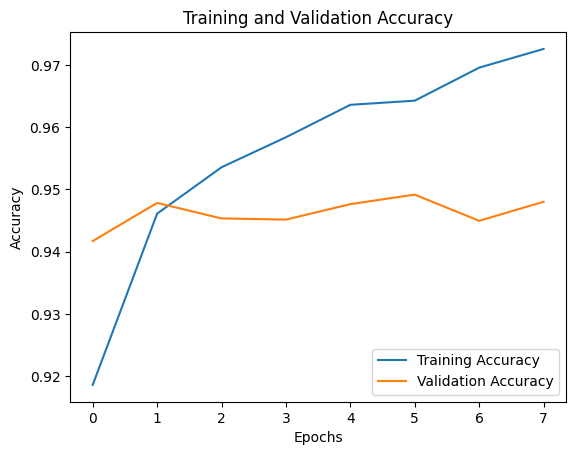

In [9]:
#Evaluate and Visualize Results Plot training and validation accuracy to monitor model performance.
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

In [10]:
# Evaluate the model on the validation set
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test Accuracy: {test_acc}')

164/164 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.9486 - loss: 0.1639
Test Accuracy: 0.9497324228286743


In [11]:
# Predict on the validation set
x_val, y_val = next(validation_generator)
predictions = model.predict(x_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [12]:
# Get the actual class labels from the validation set
predicted_labels = np.argmax(predictions, axis=1)

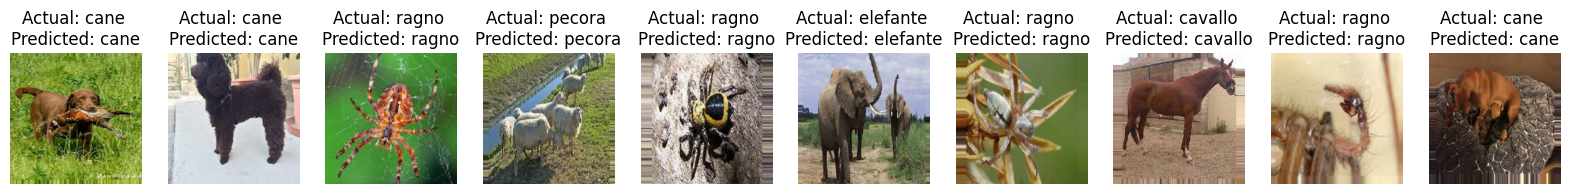

In [13]:
# Convert the dict_keys to a list
class_labels = list(train_generator.class_indices.keys())
# Number of images to display
n = 10
# Plot images with predicted and actual classes
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display the image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_val[i]) # Display the image
    # Get actual and predicted labels
    actual_label = class_labels[np.argmax(y_val[i])]
    predicted_label = class_labels[predicted_labels[i]]
    
    # Set the title
    plt.title(f"Actual: {actual_label} \nPredicted: {predicted_label}")
    plt.axis('off')
plt.show()